In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('MetaData.csv')

In [7]:
data.head(15)

,SampleID,Date,Weekend_Weekday,Location,sample_pH,SewerDepth_ft,TSS (g/L),sewer_age,sewer_material,dormitory,...,SARS_CoV_2_detectable,Latitude,Longitude,TotalReadCount,Day,Week,DaysSince,LowTemp,HighTemp,Precip
0,BAK_1,1-Sep,Weekday,Baker,9.24,5.00,0.1108,NaN,CONCRETE,BAKER,...,N,40.006749,-105.267465,11806786,Tuesday,Week 1,0,48,82,0.13
1,BAK_10,10-Sep,Weekday,Baker,8.60,5.00,0.0318,NaN,CONCRETE,BAKER,...,Y,40.006749,-105.267465,8450195,Thursday,Week 2,9,35,49,0.02
2,BAK_12,12-Sep,Weekend,Baker,7.93,5.00,0.0460,NaN,CONCRETE,BAKER,...,Y,40.006749,-105.267465,17351105,Saturday,Week 2,11,44,81,0.00
3,BAK_13,13-Sep,Weekend,Baker,9.10,5.00,0.0520,NaN,CONCRETE,BAKER,...,Y,40.006749,-105.267465,12431432,Sunday,Week 2,12,45,85,0.00
4,BAK_15,15-Sep,Weekday,Baker,7.68,5.00,0.0462,NaN,CONCRETE,BAKER,...,Y,40.006749,-105.267465,7258218,Tuesday,Week 3,14,52,88,0.00
5,BAK_17,17-Sep,Weekday,Baker,9.29,5.00,0.0420,NaN,CONCRETE,BAKER,...,Y,40.006749,-105.267465,5550826,Thursday,Week 3,16,45,85,0.00
6,BAK_19,19-Sep,Weekend,Baker,9.61,5.00,0.0492,NaN,CONCRETE,BAKER,...,Y,40.006749,-105.267465,3862329,Saturday,Week 3,18,55,87,0.00
7,BAK_20,20-Sep,Weekend,Baker,8.57,5.00,0.0734,NaN,CONCRETE,BAKER,...,Y,40.006749,-105.267465,11260993,Sunday,Week 3,19,53,82,0.00
8,BAK_3,3-Sep,Weekday,Baker,9.28,5.00,0.0992,NaN,CONCRETE,BAKER,...,Y,40.006749,-105.267465,14121862,Thursday,Week 1,2,51,85,0.00
9,BAK_6,6-Sep,Weekend,Baker,8.07,5.00,0.0806,NaN,CONCRETE,BAKER,...,N,40.006749,-105.267465,9094904,Sunday,Week 1,5,64,99,0.00


In [28]:
plt.style.use('ggplot')

# pH and TSS charts across time and locations

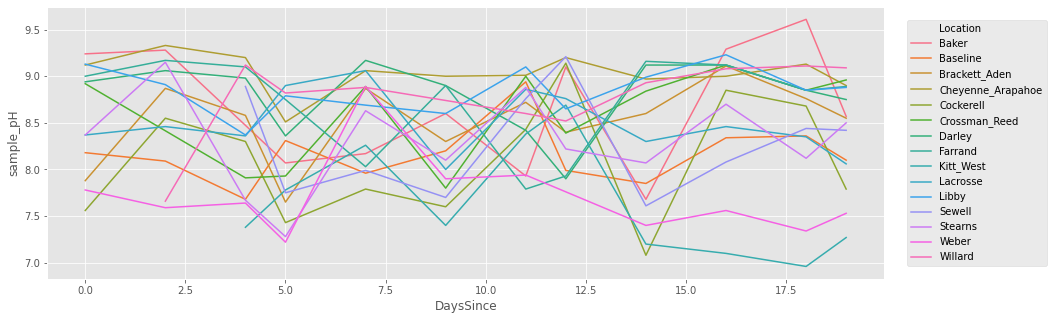

In [119]:
sns.lineplot(x=data['DaysSince'],
             y=data['sample_pH'],
             hue=data['Location'])

plt.legend(bbox_to_anchor=(1.2, 0.5),loc='right')

fig = plt.gcf()
fig.set_size_inches(15,5)

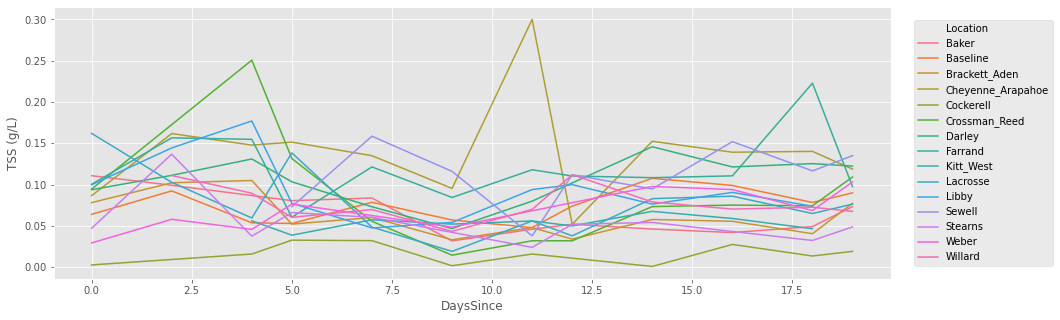

In [117]:
sns.lineplot(x=data['DaysSince'],
             y=data['TSS (g/L)'],
             hue=data['Location'])

plt.legend(bbox_to_anchor=(1.2, 0.5),loc='right')

fig = plt.gcf()
fig.set_size_inches(15,5)

# Average data for each day across all locations

In [61]:
days_grouped_avg = data.groupby(by='DaysSince',as_index=False).mean()

In [62]:
days_grouped_avg.head()

,DaysSince,sample_pH,SewerDepth_ft,TSS (g/L),sewer_age,resident_population_equivalents,sample_volume_L,Latitude,Longitude,TotalReadCount,LowTemp,HighTemp,Precip
0,0,8.540833,10.548611,0.080800,NaN,637.083333,9.691667,40.003680,-105.260151,1.064598e+07,48.0,82.0,0.13
1,2,8.676667,10.215278,0.116036,NaN,602.083333,8.783333,40.003541,-105.260222,1.252598e+07,51.0,85.0,0.00
2,4,8.370000,10.636905,0.101908,NaN,582.785714,8.671429,40.004140,-105.261082,1.223862e+07,57.0,99.0,0.00
3,5,8.103333,10.261111,0.079760,NaN,569.133333,7.780000,40.004314,-105.261508,1.269963e+07,64.0,99.0,0.00
4,7,8.556000,10.261111,0.076333,NaN,569.133333,8.120000,40.004314,-105.261508,1.310336e+07,32.0,75.0,0.85


(6.0, 10.0)

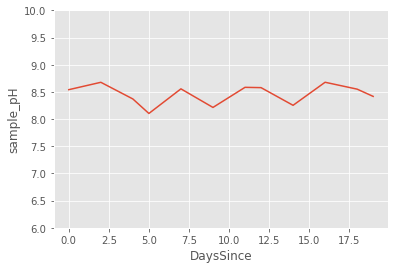

In [120]:
fig = sns.lineplot(days_grouped_avg['DaysSince'],
             days_grouped_avg['sample_pH'])
fig.set_ylim(6,10)

No real trend here^

(0.0, 0.2)

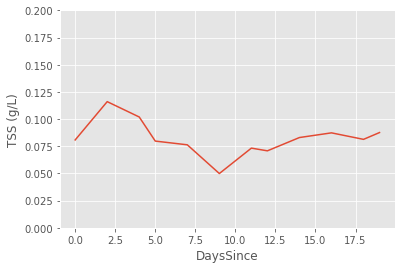

In [80]:
fig = sns.lineplot(days_grouped_avg['DaysSince'],
             days_grouped_avg['TSS (g/L)'])
fig.set_ylim(0,0.2)

No real trend over time, but TSS dips when temperature does (see below)

(20.0, 100.0)

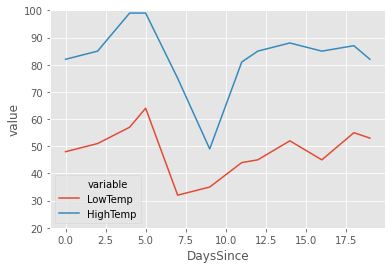

In [89]:
temps = ['DaysSince', 'LowTemp','HighTemp']
melted_temps = days_grouped_avg[temps].melt(id_vars=['DaysSince'])

fig = sns.lineplot(melted_temps['DaysSince'],
                  melted_temps['value'],
                  hue=melted_temps['variable'])
fig.set_ylim(20,100)

(0.0, 1.0)

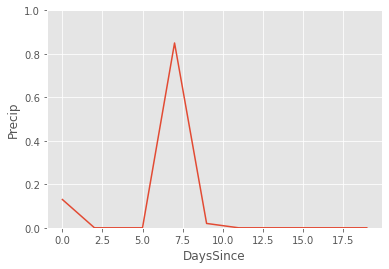

In [91]:
fig = sns.lineplot(days_grouped_avg['DaysSince'],
             days_grouped_avg['Precip'])
fig.set_ylim(0,1)

Perhaps the decrease in TSS could be explained by the increase in liquid from the precipitation? (since it's g/L) 

# Exploring any potential correlations between these variables

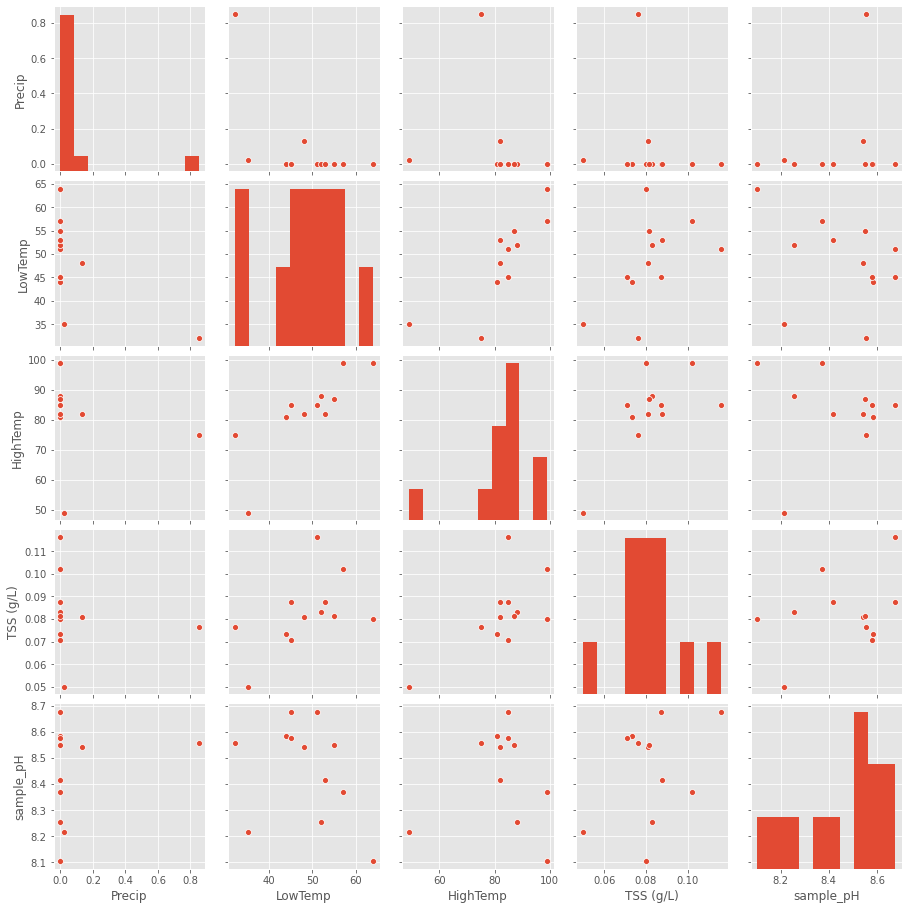

In [93]:
sns.pairplot(data=days_grouped_avg[['Precip','LowTemp','HighTemp','TSS (g/L)','sample_pH']])

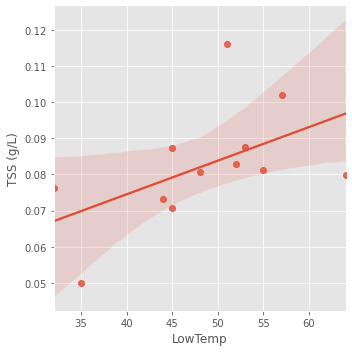

In [111]:
sns.lmplot(x='LowTemp',
           y='TSS (g/L)',
           data=days_grouped_avg)

In [97]:
from scipy import stats

In [131]:
res = stats.pearsonr(days_grouped_avg['TSS (g/L)'], 
                     days_grouped_avg['HighTemp'])

print(f'Averages for each day: \nr^2 = {res[0]} \np = {res[1]}')

Averages for each day: 
r^2 = 0.6557870079016656 
p = 0.020586575098495503


In [130]:
res = stats.pearsonr(data['TSS (g/L)'][data['TSS (g/L)'].isnull()==False],
               data['HighTemp'][data['TSS (g/L)'].isnull()==False])

print(f'All data: \nr^2 = {res[0]} \np = {res[1]}')

All data: 
r^2 = 0.22294408563784887 
p = 0.004111930364226177


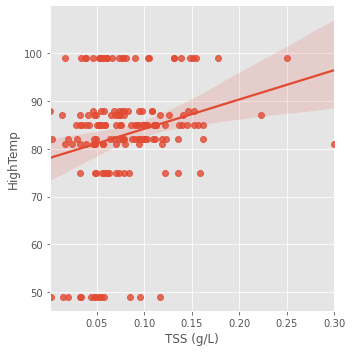

In [128]:
sns.lmplot('TSS (g/L)',
           'HighTemp',
            data=data[data['TSS (g/L)'].isnull()==False])

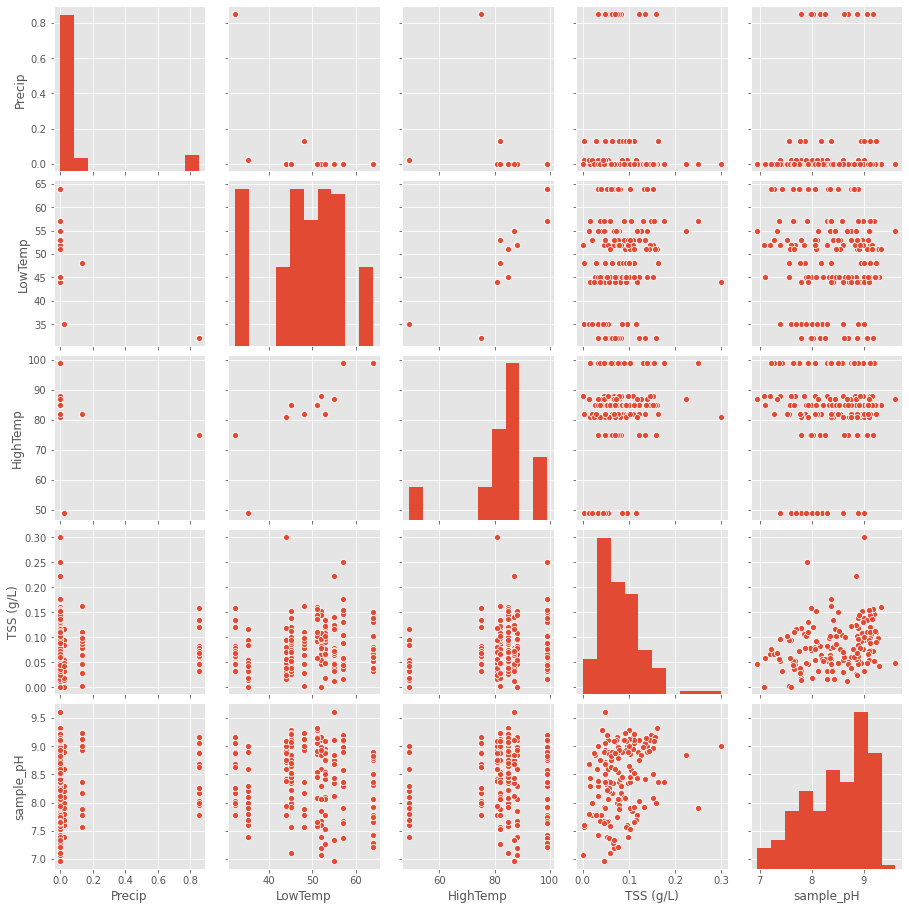

In [115]:
sns.pairplot(data[['Precip','LowTemp','HighTemp','TSS (g/L)','sample_pH']])

In [152]:
nonulls = data[data['TSS (g/L)'].isnull()==False]
nonulls = nonulls[data['sample_pH'].isnull()==False]

/opt/anaconda3/envs/qiime2-2020.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [156]:
res = stats.pearsonr(nonulls['TSS (g/L)'],
                     nonulls['sample_pH'])

print(f'Pearson correlation TSS and pH from all data: \nr^2 = {res[0]} \np = {res[1]}')

Pearson correlation TSS and pH from all data: 
r^2 = 0.26211789209014297 
p = 0.0007247559778606114


In [159]:
res = stats.pearsonr(days_grouped_avg['TSS (g/L)'],
                     days_grouped_avg['sample_pH'])

print(f'Pearson correlation TSS and pH from day averages: \nr^2 = {res[0]} \np = {res[1]}')

Pearson correlation TSS and pH from day averages: 
r^2 = 0.3547114781936257 
p = 0.2579054526908374
